In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

In [10]:
bootsample = sample_data.sample(200, replace=True)
mean_coff = bootsample[bootsample['drinks_coffee'] == True]['height'].mean()
mean_nocoff = bootsample[bootsample['drinks_coffee'] == False]['height'].mean()
mean_coff - mean_nocoff


1.8352657982511147

In [11]:
diff = [] 
for _ in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    mean_coff = bootsample[bootsample['drinks_coffee'] == True]['height'].mean()
    mean_nocoff = bootsample[bootsample['drinks_coffee'] == False]['height'].mean()
    diff.append(mean_coff - mean_nocoff)

(array([  24.,  109.,  546., 1516., 2627., 2825., 1662.,  567.,  106.,
          18.]),
 array([-0.43028277, -0.07929544,  0.2716919 ,  0.62267923,  0.97366656,
         1.3246539 ,  1.67564123,  2.02662857,  2.3776159 ,  2.72860323,
         3.07959057]),
 <BarContainer object of 10 artists>)

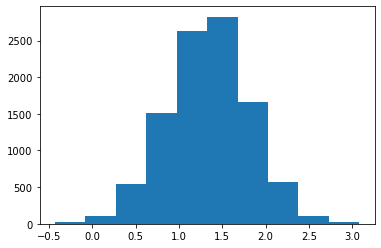

In [12]:
plt.hist(diff)

In [16]:
np.percentile(diff, 0.5), np.percentile(diff, 99.5)

(0.10258900080919674, 2.5388333707966284)

In [19]:
diffs = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace=True)
    coff_mean = bootsamp[bootsamp['drinks_coffee'] == True]['height'].mean()
    nocoff_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    diffs.append(coff_mean - nocoff_mean)
    
np.percentile(diffs, 0.5), np.percentile(diffs, 99.5)

(0.13589915206465278, 2.56345368597777)

In [20]:
diffs_age = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace=True)
    under21_mean = bootsamp[bootsamp['age'] == '<21']['height'].mean()
    over21_mean = bootsamp[bootsamp['age'] != '<21']['height'].mean()
    diffs_age.append(over21_mean - under21_mean)
    
np.percentile(diffs_age, 0.5), np.percentile(diffs_age, 99.5)

(3.384624971838642, 5.104835967037875)

In [24]:
diffs_coff_under21 = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace=True)
    under21_coff_mean = bootsamp.query("age== '<21' and drinks_coffee==True")['height'].mean()
    under21_nocoff_mean = bootsamp.query("age== '<21' and drinks_coffee==False")['height'].mean()
    diffs_coff_under21.append(under21_coff_mean - under21_nocoff_mean)
np.percentile(diffs_coff_under21, 2.5), np.percentile(diffs_coff_under21, 97.5)

(-2.620755435266737, -1.0903808546391958)

In [25]:
diffs_coff_over21 = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace=True)
    over21_coff_mean = bootsamp.query("age!= '<21' and drinks_coffee==True")['height'].mean()
    over21_nocoff_mean = bootsamp.query("age!= '<21' and drinks_coffee==False")['height'].mean()
    diffs_coff_over21.append(over21_coff_mean - over21_nocoff_mean)
np.percentile(diffs_coff_over21, 2.5), np.percentile(diffs_coff_over21, 97.5)

(-4.388297696801759, -1.8286979057770791)